In [1]:
# Import Splinter and BeautifulSoup
from splinter import Browser
from bs4 import BeautifulSoup as soup
from webdriver_manager.chrome import ChromeDriverManager
import matplotlib.pyplot as plt
import pandas as pd
import json

In [2]:
url = 'https://data-class-mars-challenge.s3.amazonaws.com/Mars/index.html'

# Method 1: Pandas

In [3]:
mars_df = pd.read_html(url)
mars_df

[        id terrestrial_date   sol   ls  month  min_temp  pressure
 0        2       2012-08-16    10  155      6     -75.0     739.0
 1       13       2012-08-17    11  156      6     -76.0     740.0
 2       24       2012-08-18    12  156      6     -76.0     741.0
 3       35       2012-08-19    13  157      6     -74.0     732.0
 4       46       2012-08-20    14  157      6     -74.0     740.0
 ...    ...              ...   ...  ...    ...       ...       ...
 1862  1889       2018-02-23  1973  133      5     -78.0     730.0
 1863  1892       2018-02-24  1974  134      5     -77.0     729.0
 1864  1894       2018-02-25  1975  134      5     -76.0     729.0
 1865  1893       2018-02-26  1976  135      5     -77.0     728.0
 1866  1895       2018-02-27  1977  135      5     -77.0     727.0
 
 [1867 rows x 7 columns]]

In [4]:
mars_df = mars_df[0]
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [5]:
mars_df.set_index("id")
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [6]:
mars_df.dtypes

id                    int64
terrestrial_date     object
sol                   int64
ls                    int64
month                 int64
min_temp            float64
pressure            float64
dtype: object

In [7]:
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'])
mars_df.dtypes


id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

In [8]:
mars_df

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [9]:
# How many months exist on Mars?
num_months = mars_df['month'].nunique()
num_months

12

In [10]:
# How many Martian (and not Earth) days worth of data exist in the scraped dataset?
num_sols = mars_df['sol'].nunique()
num_sols

1867

In [126]:
# What are the coldest and the warmest months on Mars (at the location of Curiosity)?
#Get the answer by averaging the minimum daily temperature of all the months.
monthly_temps = pd.DataFrame(mars_df.groupby('month').mean().min_temp)
monthly_min_temp = monthly_temps['min_temp'].min()
monthly_max_temp = monthly_temps['min_temp'].max()

i = monthly_temps['min_temp'].idxmin()
print("month {} is the coldest month with an average of {:.2f}°".format(i, monthly_min_temp))
i = monthly_temps['min_temp'].idxmax()
print("month {} is the warmest month with an average of {:.2f}°".format(i, monthly_max_temp))


month 3 is the coldest month with an average of -83.31°
month 8 is the warmest month with an average of -68.38°


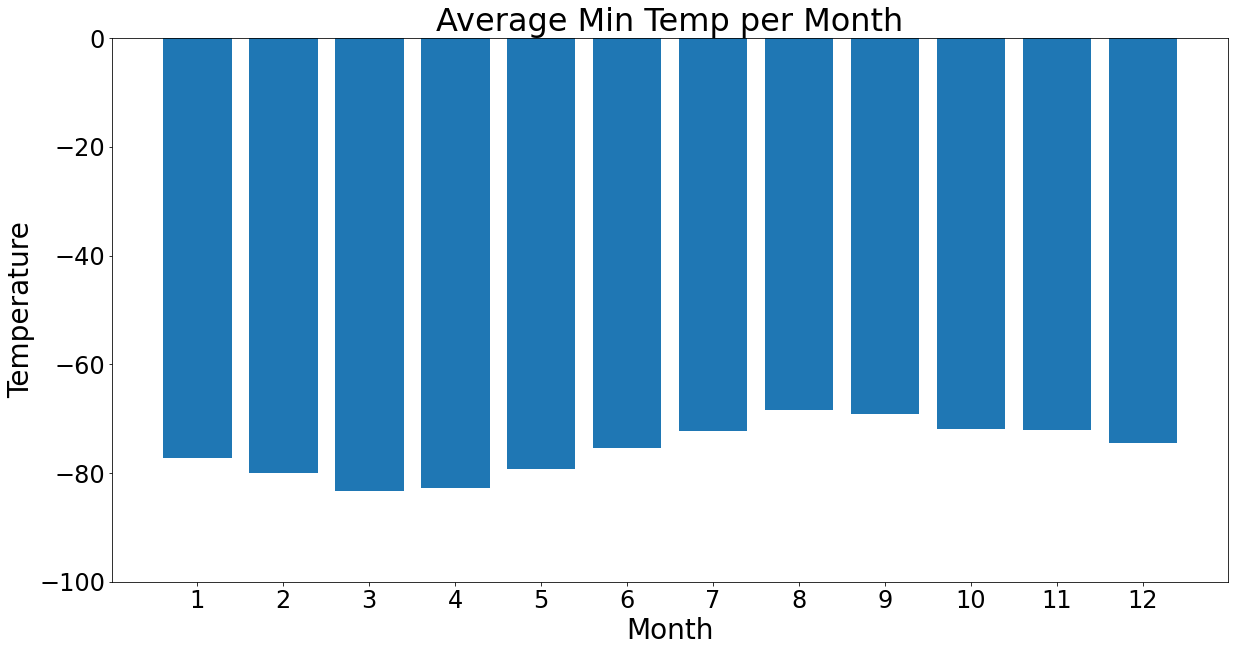

In [123]:
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Average Min Temp per Month", size=32)
ax.set_ylim(-100, 0)
ax.set_ylabel("Temperature", size=28)
ax.set_xlabel("Month", size=28)
ax.bar(monthly_temps.index, monthly_temps['min_temp'])
#ax.legend(['Rural', 'Suburban', 'Urban'])
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.xticks(monthly_temps.index)
plt.savefig('analysis/avg-monthly-min-temp.png')
plt.show()

In [130]:
# Which months have the lowest and the highest atmospheric pressure on Mars?
# Get the answer by averaging the daily atmospheric pressure of all the months.
monthly_pressure = pd.DataFrame(mars_df.groupby('month').mean().pressure)
monthly_min_pressure = monthly_pressure['pressure'].min()
monthly_max_pressure = monthly_pressure['pressure'].max()

i = monthly_pressure['pressure'].idxmin()
print("month {} is the lowest pressure month with an average of {:.2f}".format(i, monthly_min_pressure))
i = monthly_pressure['pressure'].idxmax()
print("month {} is the highest pressure month with an average of {:.2f}".format(i, monthly_max_pressure))


month 6 is the lowest pressure month with an average of 745.05
month 9 is the highest pressure month with an average of 913.31


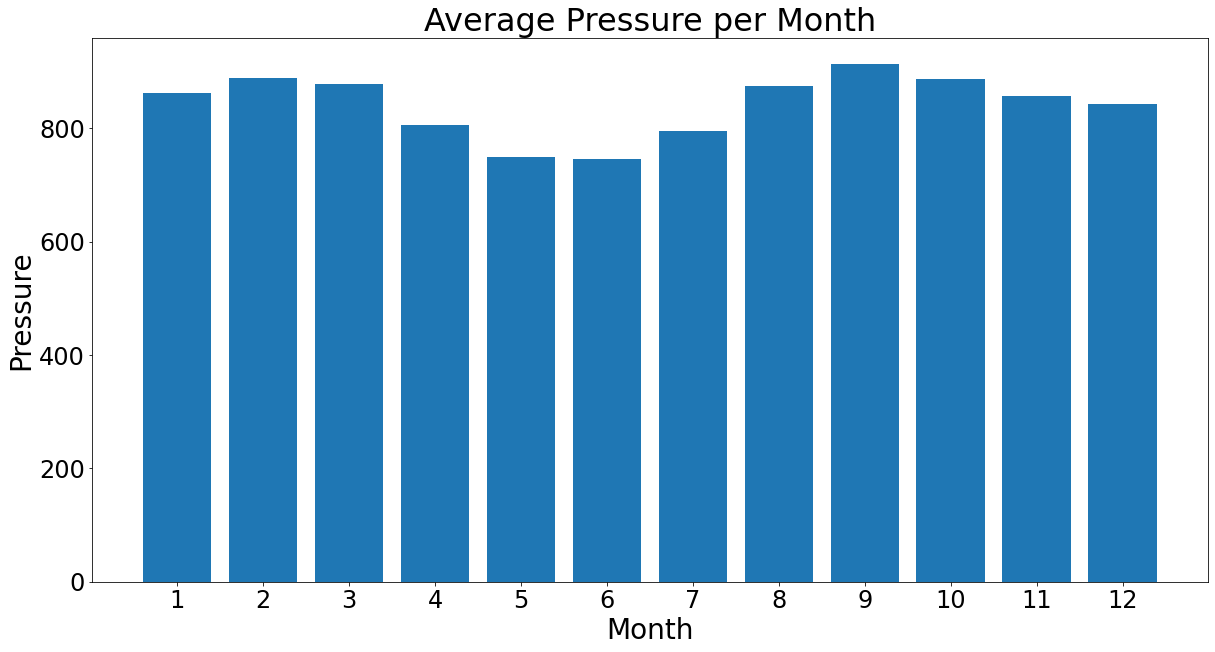

In [152]:
# Plot the results as a bar chart.
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Average Pressure per Month", size=32)
#ax.set_ylim(-100, 0)
ax.set_ylabel("Pressure", size=28)
ax.set_xlabel("Month", size=28)
ax.bar(monthly_pressure.index, monthly_pressure['pressure'])
#ax.legend(['Rural', 'Suburban', 'Urban'])
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)
plt.xticks(monthly_pressure.index)
plt.savefig('analysis/avg-monthly-pressure.png')
plt.show()

In [ ]:
# About how many terrestrial (Earth) days exist in a Martian year?
# That is, in the time that Mars circles the Sun once, how many days elapse on Earth?
# Visually estimate the result by plotting the daily minimum temperature.

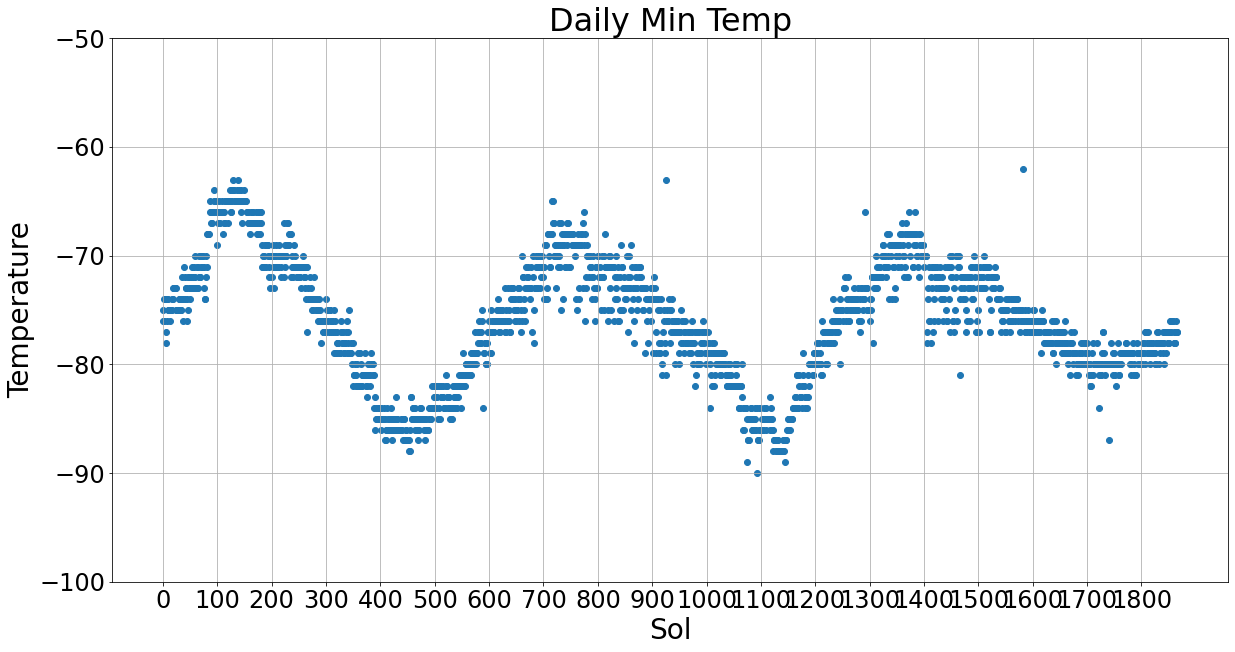

In [169]:
import numpy as np
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Daily Min Temp", size=32)
ax.set_ylim(-100, -50)
ax.set_ylabel("Temperature", size=28)
ax.set_xlabel("Sol", size=28)
ax.scatter(mars_df.index, mars_df['min_temp'])
ax.set_xticks(np.arange(0, len(mars_df['min_temp'])+1, 100))
ax.grid(True)

#ax.legend(['Rural', 'Suburban', 'Urban'])
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)

#plt.xticks(mars_df.index)
plt.savefig('analysis/daily-min-temp.png')
plt.show()

In [ ]:
# Plot the same chart with solar longitude instead of temperature

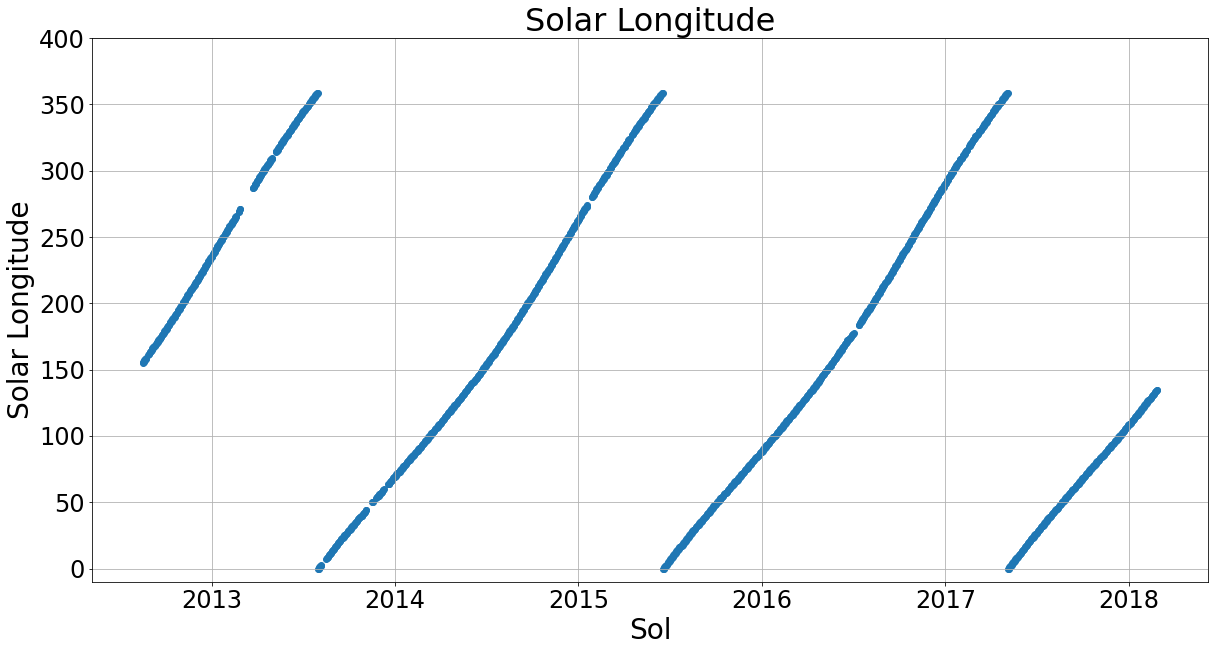

In [177]:
import numpy as np
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title("Solar Longitude", size=32)
ax.set_ylim(-10, 400)
#ax.set_xlim('2015-06-19', '2017-06-19')
ax.set_ylabel("Solar Longitude", size=28)
ax.set_xlabel("Sol", size=28)
ax.scatter(mars_df.terrestrial_date, mars_df['ls'])
#ax.set_xticks(np.arange(0, len(mars_df['ls'])+1, 2000))
ax.grid(True)

#ax.legend(['Rural', 'Suburban', 'Urban'])
plt.tick_params(axis='x', labelsize=24)
plt.tick_params(axis='y', labelsize=24)

#plt.xticks(mars_df.index)
plt.savefig('analysis/daily-solar-longitude.png')
plt.show()

In [ ]:
# Export the DataFrame to a CSV file.

In [155]:
mars_df.to_csv('mars_df.csv', index = True)

# Method 2: Splinter & Beautiful Soup

In [ ]:
executable_path = {'executable_path': ChromeDriverManager().install()}
browser = Browser('chrome', **executable_path, headless=False)

In [ ]:
# Visit the Mars NASA news site
browser.visit(url)
# Optional delay for loading the page
browser.is_element_present_by_css('div.list_text', wait_time=1)